In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
#인증키
key = 

In [3]:
url = 'http://openAPI.seoul.go.kr:8088/'+key+'/json/ListSnowRemoveBox/1/1000/'
url2= "http://openAPI.seoul.go.kr:8088/"+key+"/json/ListSnowRemoveBox/1001/2000/"
url3 = "http://openAPI.seoul.go.kr:8088/"+key+"/json/ListSnowRemoveBox/2001/3000/"
url4 = "http://openAPI.seoul.go.kr:8088/"+key+"/json/ListSnowRemoveBox/3001/3590/"
#1000까지는 긁어지는데 1500은안됨 for문으로 만들어줘서 크롤링한다. 

In [4]:
response = requests.get(url)
urlLst =[url, url2,url3, url4]

In [5]:
response.status_code # 성공 404 나 다르게 나오면 error

200

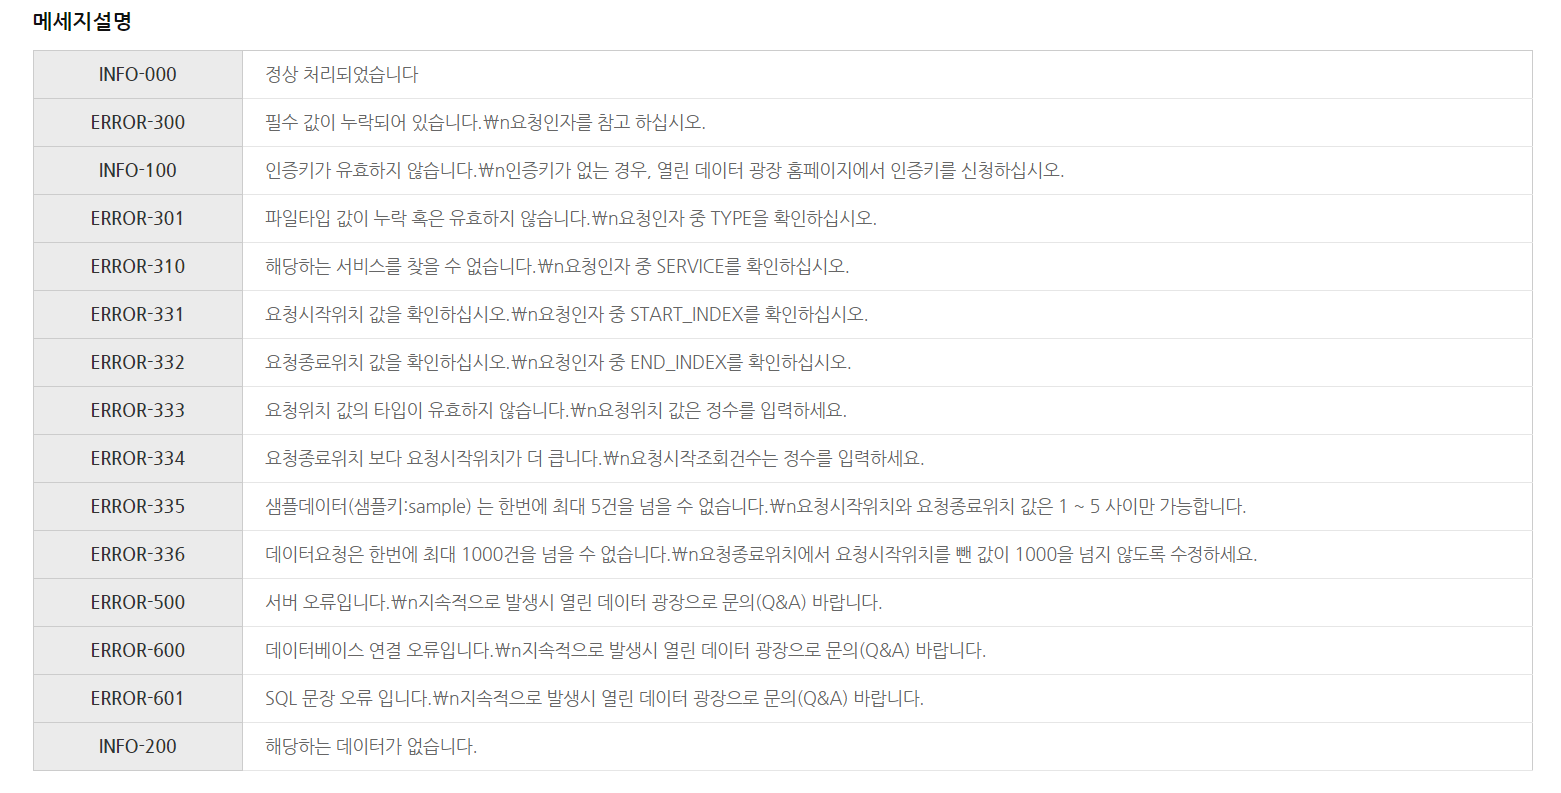

In [6]:
snowbox_dict = response.json()

In [7]:
type(snowbox_dict)

dict

In [8]:
print('dict keys : ',snowbox_dict.keys())

dict keys :  dict_keys(['ListSnowRemoveBox'])


In [9]:
snowbox_dict['ListSnowRemoveBox'].keys()

dict_keys(['list_total_count', 'RESULT', 'row'])

## response.json() 구조
* dict 타입으로 되어 있음
* key : ListSnowRemoveBox
* items : 또 하나의 dict 타입이 ListSnowRemoveBox의 item으로 들어있음
* 하위의 key : 'list_total_count', 'RESULT', 'row'
    * list_total_count : 총 데이터의 개수를 알려줌
    * RESULT : 데이터를 잘 가져왔는지 알려줌
    * row : 필요한 데이터

In [10]:
#총 데이터의 개수
snowbox_dict['ListSnowRemoveBox']['list_total_count']

3855

In [32]:
#데이터를 잘 가져왔는지 알려줌
snowbox_dict['ListSnowRemoveBox']['RESULT']

{'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}

In [13]:
#data
snowbox_dict['ListSnowRemoveBox']['row'][0]

{'G2_ID': 1.0,
 'SBOX_NUM': '동부-001',
 'MGC_NM': '동부도로',
 'DETL_CN': '종합운동장분기점 (한남)',
 'RM': '올림픽대로',
 'G2_XMIN': 206851.4,
 'G2_YMIN': 546455.3,
 'G2_XMAX': 206851.4,
 'G2_YMAX': 546455.3}

In [14]:
snowbox = snowbox_dict['ListSnowRemoveBox']['row']

###### dictionary의 keys를 list로 뽑고 싶으면 [*dict] 하면 된다!

In [15]:
snowbox_dt = pd.DataFrame(columns=[*snowbox[0]]) #dictionary keys -> list
snowbox_dt

,G2_ID,SBOX_NUM,MGC_NM,DETL_CN,RM,G2_XMIN,G2_YMIN,G2_XMAX,G2_YMAX


In [49]:
[*snowbox[0]]

['G2_ID',
 'SBOX_NUM',
 'MGC_NM',
 'DETL_CN',
 'RM',
 'G2_XMIN',
 'G2_YMIN',
 'G2_XMAX',
 'G2_YMAX']

In [16]:
for column in [*snowbox[0]] :
    snowbox_dt[column] = [x[column] for x in snowbox]

In [18]:
snowbox_dt.head()

,G2_ID,SBOX_NUM,MGC_NM,DETL_CN,RM,G2_XMIN,G2_YMIN,G2_XMAX,G2_YMAX
0,1.0,동부-001,동부도로,종합운동장분기점 (한남),올림픽대로,206851.4,546455.3,206851.4,546455.3
1,2.0,동부-002,동부도로,청담1교 직전 (하남),올림픽대로,205725.8,546722.6,205725.8,546722.6
2,3.0,동부-003,동부도로,천호대교 남단 UP램프,천호대교,210496.4,549203.2,210496.4,549203.2
3,4.0,동부-004,동부도로,올림픽대교 남단,올림픽대교,209532.3,547879.1,209532.3,547879.1
4,5.0,동부-005,동부도로,올림픽대교 북단 UP램프,올림픽대교,208708.1,548541.2,208708.1,548541.2


## urlLst에 담긴전체 데이터를 가져와보자

In [48]:
DETL_CN = []
G2_ID = []
G2_XMAX = []
G2_YMIN = []
MGC_NM = []

In [49]:
for myurl in urlLst:
    response = requests.get(myurl)
    print(response.status_code)
    dt = response.json()
    info = dt['ListSnowRemoveBox']['row']
    DETL_CN.extend([x['DETL_CN'] for x in info])
    G2_ID.extend([x['G2_ID'] for x in info])
    G2_XMAX.extend([x['G2_XMAX'] for x in info])
    G2_YMIN.extend([x['G2_YMIN'] for x in info])
    MGC_NM.extend([x['MGC_NM'] for x in info])

200
200
200
200


In [50]:
snowbox_dt = pd.DataFrame({"DETL_CN" : DETL_CN, "G2_ID" : G2_ID,"G2_XMAX" : G2_XMAX,"G2_YMIN":G2_YMIN,"MGC_NM":MGC_NM } )

In [51]:
snowbox_dt.head()

,DETL_CN,G2_ID,G2_XMAX,G2_YMIN,MGC_NM
0,종합운동장분기점 (한남),1.0,206851.4,546455.3,동부도로
1,청담1교 직전 (하남),2.0,205725.8,546722.6,동부도로
2,천호대교 남단 UP램프,3.0,210496.4,549203.2,동부도로
3,올림픽대교 남단,4.0,209532.3,547879.1,동부도로
4,올림픽대교 북단 UP램프,5.0,208708.1,548541.2,동부도로


In [52]:
len(snowbox_dt)

3590

In [56]:
snowbox_dt['MGC_NM'].unique()

array(['동부도로', '서부도로사업소', '남부도로사업소', '북부도로사업소', '성동도로사업소', '강서도로사업소',
       '종로구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '영등포구', '관악구', '서초구',
       '강남구', '송파구', '강동구', '중구', '금천구', '서울시설공단', '동작구'], dtype=object)

In [57]:
snowbox_dt['MGC_NM'].value_counts()

종로구        471
강남구        249
노원구        204
성동구        203
성북구        199
금천구        182
영등포구       170
강북구        168
동대문구       158
중구         124
서초구        122
강서구        117
서대문구       106
도봉구        100
동작구         98
서울시설공단      93
강동구         92
마포구         92
용산구         91
양천구         88
광진구         86
은평구         81
중랑구         81
송파구         58
관악구         51
성동도로사업소     42
동부도로        22
서부도로사업소     21
강서도로사업소     17
남부도로사업소      2
북부도로사업소      2
Name: MGC_NM, dtype: int64